In [1]:
import torch

torch.cuda.is_available()

True

In [2]:
import torch
import torch.nn as nn

class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, preds, targets):
        # Invert the mask: foreground = 1, background = 0
        targets = 1 - targets
        
        # Flatten tensors for batch-wise calculation
        preds = preds.contiguous().view(-1)
        targets = targets.contiguous().view(-1)
        
        # Calculate intersection and sums
        intersection = (preds * targets).sum()
        dice_score = (2. * intersection + self.smooth) / (preds.sum() + targets.sum() + self.smooth)
        
        # Return dice loss
        return 1 - dice_score

# Example usage
if __name__ == "__main__":
    preds = torch.sigmoid(torch.randn(3, 1, 256, 256))  # Simulated predictions
    targets = torch.randint(0, 2, (3, 1, 256, 256)).float()  # Simulated mask (0: black, 1: white)
    
    criterion = DiceLoss()
    loss = criterion(preds, targets)
    print(f"Dice Loss: {loss.item()}")


Dice Loss: 0.49972712993621826


Dice Loss: 0.500175952911377


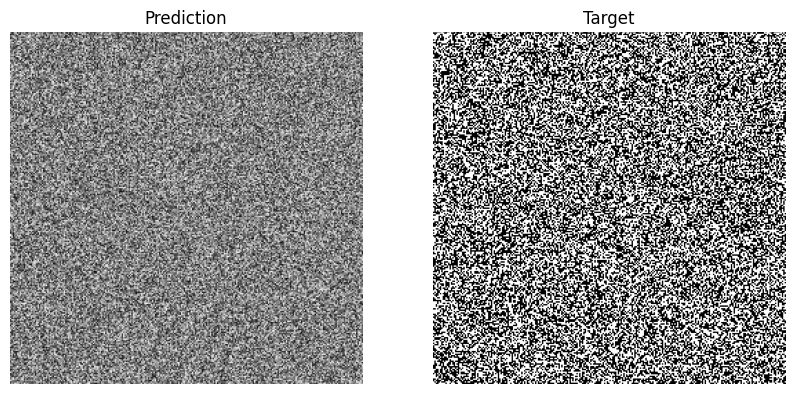

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, preds, targets):
        # Invert the mask: foreground = 1, background = 0
        targets = 1 - targets
        
        # Flatten tensors for batch-wise calculation
        preds = preds.contiguous().view(-1)
        targets = targets.contiguous().view(-1)
        
        # Calculate intersection and sums
        intersection = (preds * targets).sum()
        dice_score = (2. * intersection + self.smooth) / (preds.sum() + targets.sum() + self.smooth)
        
        # Return dice loss
        return 1 - dice_score

def show_images(preds, targets, idx=0):
    preds_img = preds[idx, 0].cpu().detach().numpy()
    targets_img = targets[idx, 0].cpu().detach().numpy()
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(preds_img, cmap='gray')
    axs[0].set_title('Prediction')
    axs[0].axis('off')
    
    axs[1].imshow(targets_img, cmap='gray')
    axs[1].set_title('Target')
    axs[1].axis('off')
    
    plt.show()

# Example usage
if __name__ == "__main__":
    # Simulated predictions and target masks
    preds = torch.sigmoid(torch.randn(3, 1, 256, 256))  # Predicted probabilities
    targets = torch.randint(0, 2, (3, 1, 256, 256)).float()  # Binary mask (0: black, 1: white)
    
    criterion = DiceLoss()
    loss = criterion(preds, targets)
    print(f"Dice Loss: {loss.item()}")
    
    # Display images
    show_images(preds, targets, idx=0)  # Show the first sample


Dice Loss (Square vs Rectangle): 0.8453148603439331


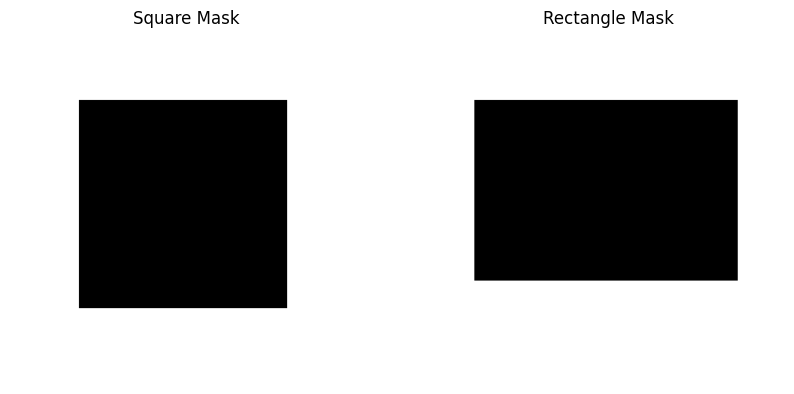

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import cv2

class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, preds, targets):
        targets = 1 - targets
        
        preds = preds.contiguous().view(-1)
        targets = targets.contiguous().view(-1)
        
        intersection = (preds * targets).sum()
        dice_score = (2. * intersection + self.smooth) / (preds.sum() + targets.sum() + self.smooth)
        
        return 1 - dice_score

def generate_shape_mask(shape, size=(256, 256)):
    mask = np.ones(size, dtype=np.uint8) * 255  
    if shape == 'square':
        cv2.rectangle(mask, (50, 50), (200, 200), 0, -1)  # Black square
    elif shape == 'rectangle':
        cv2.rectangle(mask, (30, 50), (220, 180), 0, -1)  # Black rectangle
    return mask / 255.0  # Normalize to [0, 1]

def show_images(preds, targets):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(preds[0, 0].cpu().detach().numpy(), cmap='gray')
    axs[0].set_title('Square Mask')
    axs[0].axis('off')
    
    axs[1].imshow(targets[0, 0].cpu().detach().numpy(), cmap='gray')
    axs[1].set_title('Rectangle Mask')
    axs[1].axis('off')
    
    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate synthetic masks
    square_mask = generate_shape_mask('square')
    rectangle_mask = generate_shape_mask('rectangle')
    
    square_tensor = torch.tensor(square_mask).unsqueeze(0).unsqueeze(0).float()  # Shape: [1, 1, H, W]
    rectangle_tensor = torch.tensor(rectangle_mask).unsqueeze(0).unsqueeze(0).float()  # Shape: [1, 1, H, W]
    
    # Dice loss calculation
    criterion = DiceLoss()
    loss = criterion(square_tensor, rectangle_tensor)
    print(f"Dice Loss (Square vs Rectangle): {loss.item()}")
    
    # Display images
    show_images(square_tensor, rectangle_tensor)
